In [3]:
import os, random
import numpy as np
import pandas as pd
import cv2
from natsort import natsorted

from sklearn.model_selection import train_test_split

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
train_data_path = "../../dataset/ultrasound_nerve_segmentation/train/"
test_data_path = "../../dataset/ultrasound_nerve_segmentation/test/"
root_path = "../../dataset/ultrasound_nerve_segmentation/"

In [14]:
def create_train_data(data_path, img_rows=420, img_cols=580):
    imageList = natsorted(os.listdir(data_path))
    total = int(len(imageList)/2)
    imgShape = (total, img_rows, img_cols)
    i = 0
    j = 0
    
    masks = np.ndarray(imgShape, dtype=np.uint8)
    images = np.ndarray(imgShape, dtype=np.uint8) 
    
    for imageName in imageList:
        if imageName.endswith("_mask.tif"):
            mask = cv2.imread(os.path.join(data_path, imageName), cv2.IMREAD_GRAYSCALE)
            masks[i] = mask
            i += 1
        else:
            image = cv2.imread(os.path.join(data_path, imageName), cv2.IMREAD_GRAYSCALE)
            images[j] = image
            j += 1
            
        if j % 100 == 0:
            print("Done: {0}/{1} images".format(j, total))
                    
    return images, masks

In [15]:
def create_test_data(data_path, img_rows=420, img_cols=580):
    imageList = natsorted(os.listdir(data_path))
    total = len(imageList)
    imgShape = (total, img_rows, img_cols)
    j = 0
    
    images = np.ndarray(imgShape, dtype=np.uint8)
    
    for imageName in imageList:
        image = cv2.imread(os.path.join(data_path, imageName), cv2.IMREAD_GRAYSCALE)
        images[j] = image
        j += 1

        if j % 100 == 0:
            print("Done: {0}/{1} images".format(j, total))
                    
    return images

In [16]:
trainImages, trainMasks = create_train_data(train_data_path)
testImages = create_test_data(test_data_path)

Done: 100/5635 images
Done: 100/5635 images
Done: 200/5635 images
Done: 200/5635 images
Done: 300/5635 images
Done: 300/5635 images
Done: 400/5635 images
Done: 400/5635 images
Done: 500/5635 images
Done: 500/5635 images
Done: 600/5635 images
Done: 600/5635 images
Done: 700/5635 images
Done: 700/5635 images
Done: 800/5635 images
Done: 800/5635 images
Done: 900/5635 images
Done: 900/5635 images
Done: 1000/5635 images
Done: 1000/5635 images
Done: 1100/5635 images
Done: 1100/5635 images
Done: 1200/5635 images
Done: 1200/5635 images
Done: 1300/5635 images
Done: 1300/5635 images
Done: 1400/5635 images
Done: 1400/5635 images
Done: 1500/5635 images
Done: 1500/5635 images
Done: 1600/5635 images
Done: 1600/5635 images
Done: 1700/5635 images
Done: 1700/5635 images
Done: 1800/5635 images
Done: 1800/5635 images
Done: 1900/5635 images
Done: 1900/5635 images
Done: 2000/5635 images
Done: 2000/5635 images
Done: 2100/5635 images
Done: 2100/5635 images
Done: 2200/5635 images
Done: 2200/5635 images
Done: 

In [17]:
trainImages.shape, trainMasks.shape, testImages.shape

((5635, 420, 580), (5635, 420, 580), (5508, 420, 580))

In [19]:
np.save(root_path + 'trainImages.npy', trainImages)
np.save(root_path + 'trainMasks.npy', trainMasks)
np.save(root_path + 'testImages.npy', testImages)

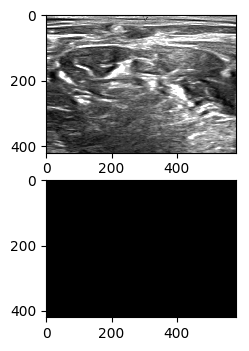

In [20]:
test_idx = random.randint(0, len(trainImages))
plt.set_cmap('gray')
plt.figure(dpi=100)
plt.subplot(211)
plt.imshow(trainImages[test_idx,:,:])

plt.subplot(212)
plt.imshow(trainMasks[test_idx,:,:])